In [1]:

import os
import numpy as np


from datetime import datetime
import re
import glob
import time
import tqdm
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(1024)  # set the same seed

plt.rcParams['figure.figsize']=[16,10]
plt.rcParams['font.size']=14

pd.options.display.max_columns = 99

In [2]:
def read_label(label_path):
    label=pd.read_csv(label_path,
               sep='\s', 
               names=["class_name", "truncated","occlusion","alpha","left","top","right","bottom",
                      "height","width","length","center_x", "center_y", "center_z", "yaw"])

    numerical_cols=["truncated","occlusion","alpha","left","top","right","bottom",
                      "height","width","length","center_x", "center_y", "center_z", "yaw"]
    label[numerical_cols] = np.float32(label[numerical_cols].values)
    return label
def read_lidar_file_lyft(lidar_path):
    scan = np.fromfile(lidar_path,dtype=np.float32)
    return scan.reshape((-1, 5))[:,0:4]
def read_lidar_file_kitti(lidar_path):
    scan = np.fromfile(lidar_path,dtype=np.float32)
    return scan.reshape((-1, 4))


In [3]:
import pandas as pd


## kitti data test

/home/lingling/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


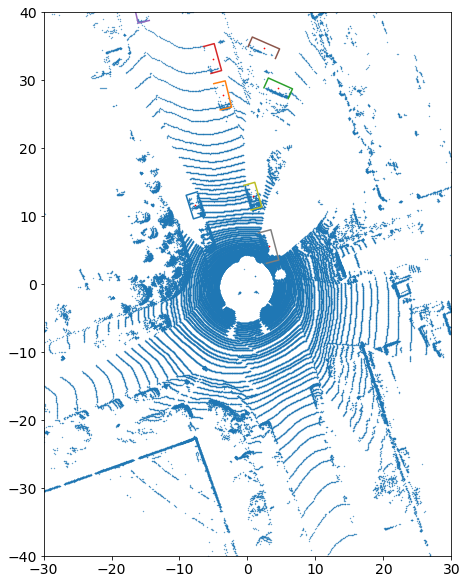

In [6]:
data_folder = '../../PointRCNN/data/KITTI/object/training/'
kitti_lidar_path = data_folder + 'velodyne/004300.bin'
kitti_label_path = data_folder + 'label_2/004300.txt'
fn = data_folder + 'calib/004300.txt'

kitti_label = read_label(kitti_label_path)
kitti_points = read_lidar_file_kitti(kitti_lidar_path)
calib_data = {}
with open (fn, 'r') as f :
    for line in f.readlines():
        if ':' in line :
            key, value = line.split(':', 1)
            calib_data[key] = np.array([float(x) for x in value.split()])
points_exp = np.concatenate((np.transpose(kitti_points[:,0:3]),np.ones((1,kitti_points.shape[0]))))
points_rect = np.transpose(np.dot(calib_data['R0_rect'].reshape(3,3),
                                  np.dot(calib_data['Tr_velo_to_cam'].reshape(3,4),points_exp)))
# see the class lidar_pointcloud
import matplotlib.pyplot as plt
def plot_2d_lidar_n_label(points,label):

    fig,ax = plt.subplots(1)

    ax.scatter(points[:,0],points[:,2],0.1)

    for idx in range(label.shape[0]):
        #print(label.shape[0])
        if label.class_name[idx] == 'DontCare':
            #print('DontCare')
            continue
        #print(label.class_name[idx])
        center_x = label.center_x[idx]
        center_y = label.center_y[idx]
        center_z = label.center_z[idx]
        width = label.length[idx]
        length = label.width[idx]
        yaw = label.yaw[idx]
        rot = np.array([[np.cos(yaw),np.sin(yaw)],[-np.sin(yaw),np.cos(yaw)]])
        ax.scatter(center_x,center_z,0.5,c='red')
        box = np.array([[width/2, width/2, -width/2, -width/2],[length/2, -length/2, -length/2, length/2]])
        box_new = np.dot(rot,box)

        ax.plot(box_new[0]+center_x,box_new[1]+center_z,'-')
    ax.set_aspect('equal', 'box')
    ax.set(ylim=(-40, 40), xlim=(-30, 30))
plot_2d_lidar_n_label(points_rect,kitti_label)
#plot_2d_lidar_n_label(kitti_points,kitti_label)
   

## transfered_kitti_from_lyft test

In [7]:
data_folder = '../../Lyft_PointRCNN/data/KITTI/object/training0/'
kitti_lidar_path = data_folder + 'velodyne/000000.bin'
kitti_label_path = data_folder + 'label_2/000000.txt'
fn = data_folder + 'calib/000000.txt'

kitti_label = read_label(kitti_label_path)
kitti_points = read_lidar_file_lyft(kitti_lidar_path)
calib_data = {}
with open (fn, 'r') as f :
    for line in f.readlines():
        if ':' in line :
            key, value = line.split(':', 1)
            calib_data[key] = np.array([float(x) for x in value.split()])
points_exp = np.concatenate((np.transpose(kitti_points[:,0:3]),np.ones((1,kitti_points.shape[0]))))
points_rect = np.transpose(np.dot(calib_data['R0_rect'].reshape(3,3),
                                  np.dot(calib_data['Tr_velo_to_cam'].reshape(3,4),points_exp)))
# see the class lidar_pointcloud
import matplotlib.pyplot as plt
def plot_2d_lidar_n_label(points,label):

    fig,ax = plt.subplots(1)

    ax.scatter(points[:,0],points[:,2],0.1)

    for idx in range(label.shape[0]):
        #print(label.shape[0])
        if label.class_name[idx] == 'DontCare':
            #print('DontCare')
            continue
        #print(label.class_name[idx])
        center_x = label.center_x[idx]
        center_y = label.center_y[idx]
        center_z = label.center_z[idx]
        width = label.length[idx]
        length = label.width[idx]
        yaw = label.yaw[idx]
        rot = np.array([[np.cos(yaw),np.sin(yaw)],[-np.sin(yaw),np.cos(yaw)]])
        ax.scatter(center_x,center_z,0.5,c='red')
        box = np.array([[width/2, width/2, -width/2, -width/2],[length/2, -length/2, -length/2, length/2]])
        box_new = np.dot(rot,box)

        ax.plot(box_new[0]+center_x,box_new[1]+center_z,'-')
    ax.set_aspect('equal', 'box')
    ax.set(ylim=(-40, 40), xlim=(-30, 30))
plot_2d_lidar_n_label(points_rect,kitti_label)
#plot_2d_lidar_n_label(kitti_points,kitti_label)

/home/lingling/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


FileNotFoundError: [Errno 2] No such file or directory: '../../Lyft_PointRCNN/data/KITTI/object/training0/label_2/000000.txt'

/home/lingling/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.


7
car
7
car
7
car
7
car
7
car
7
car
7
car


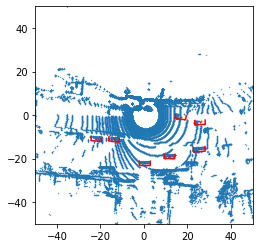

In [4]:

data_folder = '../../Lyft_PointRCNN/data/KITTI/object/testing/'
lyft_lidar_path = data_folder + 'velodyne_1/000003.bin'
lyft_label_path = '/home/lingling/Downloads/Lyft_PointRCNN/predicted/mirror/epoch_6/pred_boxes3d/Car/000003.txt'

fn ='/home/lingling/Downloads/Lyft_PointRCNN/data/KITTI/object/training/calib/' + '000003.txt'

def read_label_predict(label_path):
    label=pd.read_csv(label_path,
               sep='\s', 
               names=["confidence","center_x", "center_y", "center_z","width","length","height", "yaw","class_name"])

    numerical_cols=["confidence","center_x", "center_y", "center_z","width","length","height", "yaw"]
    label[numerical_cols] = np.float32(label[numerical_cols].values)
    return label
lyft_label = read_label_predict(lyft_label_path)
lyft_points = read_lidar_file_lyft(lyft_lidar_path)

Tr_lyft_rect = np.array([[-1,  0,  0,  0],[ 0,  0, -1,  0],[ 0,  1,  0,  0]])
points_exp = np.concatenate((np.transpose(lyft_points[:,0:3]),np.ones((1,lyft_points.shape[0]))))
points_rect = np.transpose(np.dot(Tr_lyft_rect,points_exp))
# see the class lidar_pointcloud
import matplotlib.pyplot as plt
def plot_2d_lidar_n_label(points,label):

    fig,ax = plt.subplots(1)

    ax.scatter(points[:,0],points[:,2],0.1)

    for idx in range(label.shape[0]):
        print(label.shape[0])
        if label.class_name[idx] == 'DontCare':
            print('DontCare')
            continue
        print(label.class_name[idx])
        center_x = label.center_x[idx]
        center_y = label.center_y[idx]
        center_z = label.center_z[idx]
        width = label.length[idx]
        length = label.width[idx]
        yaw = label.yaw[idx]
        rot = np.array([[np.cos(yaw),np.sin(yaw)],[-np.sin(yaw),np.cos(yaw)]])
        ax.scatter(center_x,center_z,0.5,c='red')
        box = np.array([[width/2, width/2, -width/2, -width/2],[length/2, -length/2, -length/2, length/2]])
        box_new = np.dot(rot,box)
        ax.plot(box_new[0]+center_x,box_new[1]+center_z,'-',c='red')
    ax.set_aspect('equal', 'box')
    ax.set(ylim=(-50, 50), xlim=(-50, 50))
plot_2d_lidar_n_label(points_rect,lyft_label)

In [ ]:
!ls ../../Lyft_PointRCNN/data/KITTI/object/testing/velodyne/000025.bin